In [2]:
from utils import extract_data

extract_data('data')

In [3]:
from sklearn.preprocessing import StandardScaler

from utils import preprocess

# Set up scaler.
scaler = StandardScaler()

color_data = preprocess("data/imgs/color", scaler)
grayscale_data = preprocess("data/imgs/grayscale", scaler)
segmented_data = preprocess("data/imgs/segmented", scaler)

In [4]:
from sklearn.model_selection import train_test_split

color = train_test_split(color_data[0], color_data[1], test_size=0.2)
grayscale = train_test_split(grayscale_data[0], grayscale_data[1], test_size=0.2)
segmented = train_test_split(segmented_data[0], segmented_data[1], test_size=0.2)

data = {
    'color': {
        'X_train': color[0],
        'X_test': color[1],
        'y_train': color[2],
        'y_test': color[3]
    },
    'grayscale': {
        'X_train': grayscale[0],
        'X_test': grayscale[1],
        'y_train': grayscale[2],
        'y_test': grayscale[3]
    },
    'segmented': {
        'X_train': segmented[0],
        'X_test': segmented[1],
        'y_train': segmented[2],
        'y_test': segmented[3]
    }
}

In [5]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

randomForestModel = RandomForestClassifier()
svmModel = SVC()
knnModel = KNeighborsClassifier()
decTreeModel = DecisionTreeClassifier()

Confusion Matrices - color dataset


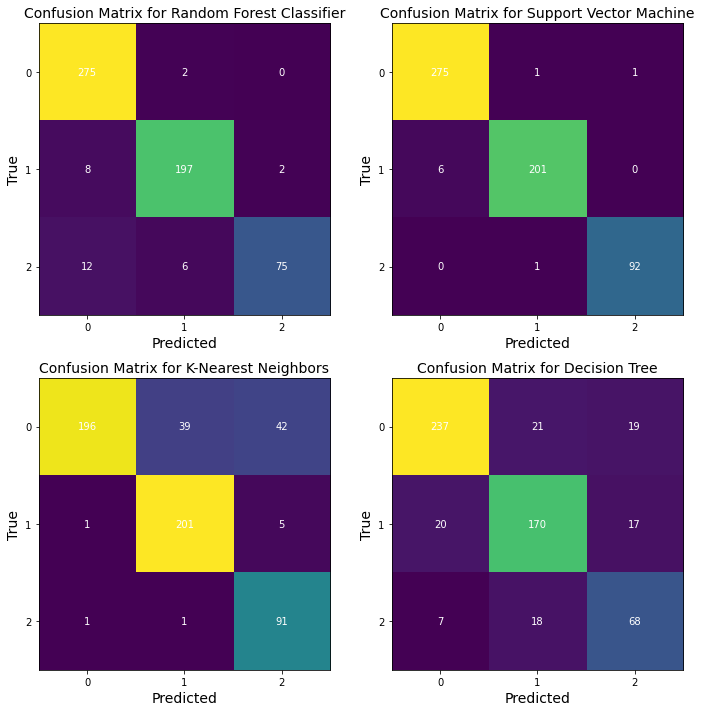

Confusion Matrices - grayscale dataset


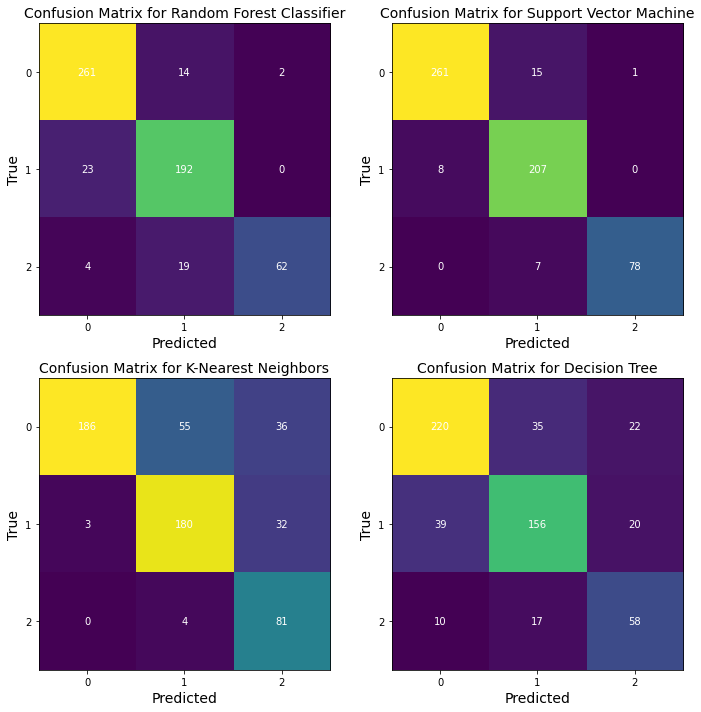

Confusion Matrices - segmented dataset


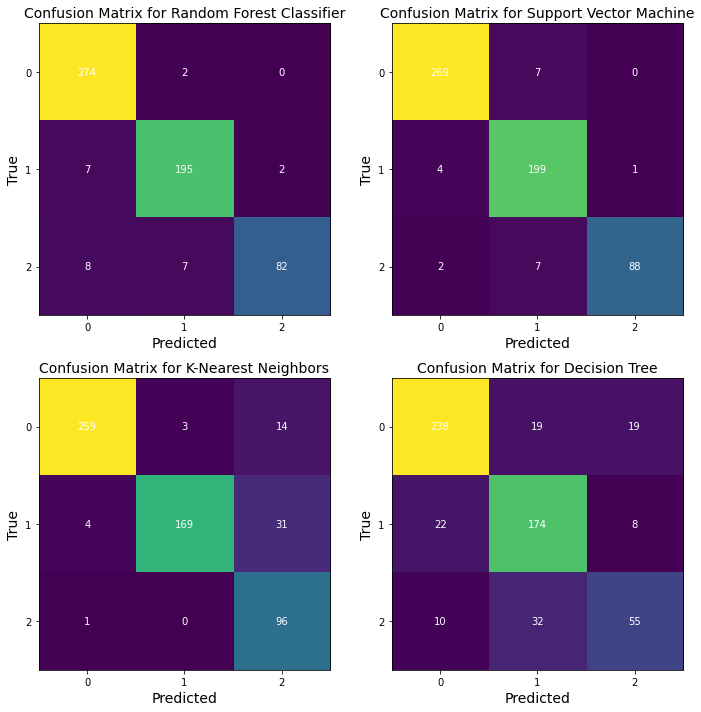

In [6]:
from utils import evaluate, plot_confusion_matrix
import matplotlib.pyplot as plt

results = {}

for img_type in data:
    X_train, y_train, X_test, y_test = data[img_type]['X_train'], data[
        img_type]['y_train'], data[img_type]['X_test'], data[img_type]['y_test']
    
    randomForestModel.fit(X_train, y_train)
    svmModel.fit(X_train, y_train)
    knnModel.fit(X_train, y_train)
    decTreeModel.fit(X_train, y_train)

    RFres = evaluate(randomForestModel, X_train, y_train, X_test, y_test)
    SVMres = evaluate(svmModel, X_train, y_train, X_test, y_test)
    KNNres = evaluate(knnModel, X_train, y_train, X_test, y_test)
    DTres = evaluate(decTreeModel, X_train, y_train, X_test, y_test)

    print(f'Confusion Matrices - {img_type} dataset')
    fig, ax = plt.subplots(figsize=(10, 10), ncols=2, nrows=2)
    plot_confusion_matrix(ax[0, 0], RFres['conf_m'], model='Random Forest Classifier')
    plot_confusion_matrix(ax[0, 1], SVMres['conf_m'], model='Support Vector Machine')
    plot_confusion_matrix(ax[1, 0], KNNres['conf_m'], model='K-Nearest Neighbors')
    plot_confusion_matrix(ax[1, 1], DTres['conf_m'], model='Decision Tree')
    plt.show()
    fig.savefig(f'plots/{img_type}_confusion_matrix.png')

    results[img_type] = {
        'RF': RFres,
        'SVM': SVMres,
        'KNN': KNNres,
        'DT': DTres
    }



In [7]:
import pandas as pd

df_res = pd.DataFrame(results)
df_res.to_pickle('results.pkl')

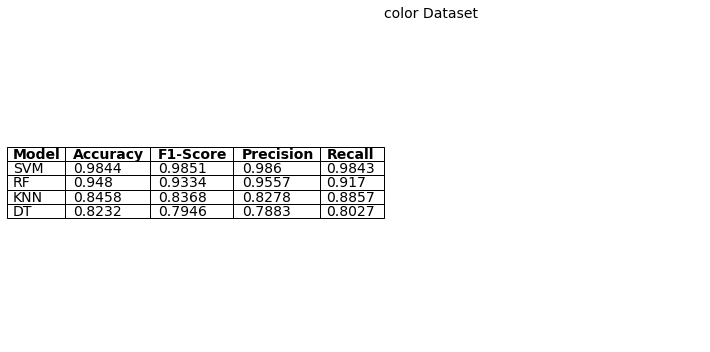

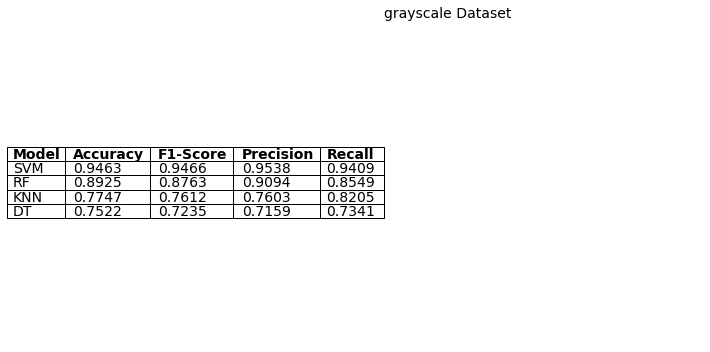

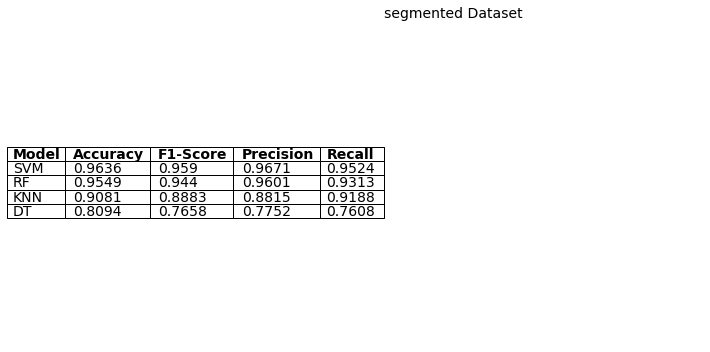

In [8]:
from utils import table_results

table_results(results)